# 绘制带箭头的曲线

In [5]:
%matplotlib inline
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib

In [6]:
t = np.linspace(0, 2*np.pi, 1000)
x = np.sin(2 * t)
y = np.cos(3 * t)

In [7]:
def add_arrows(line, n, arrow_size=7):
    ax = line.axes
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    x, y = line.get_data()

    mask = (xmin < x) & (x < xmax) & (ymin < y) & (y < ymax)

    index = np.nonzero(mask)[0]
    curves = [(x[ind], y[ind]) for ind in np.split(index, np.where(np.diff(index) > 1)[0] + 1)]
    curves_lengths = [np.cumsum(np.hypot(np.diff(xc), np.diff(yc))) for xc, yc in curves]
    total_length = sum([lengths[-1] for lengths in curves_lengths])
    step = total_length / n
    arrows = []

    for (x, y), lengths in zip(curves, curves_lengths):
        count = max(int(lengths[-1] / step), 3)
        location = np.linspace(0, lengths[-1], count)[1:-1]
        index = np.searchsorted(lengths, location)

        dx = x[index + 1] - x[index]
        dy = y[index + 1] - y[index]
        ds = np.hypot(dx, dy)
        dx /= ds
        dy /= ds

        arrows.extend(zip(x[index], y[index], dx, dy))

    x, y, u, v = zip(*arrows)

    return ax.quiver(x, y, u, v,
              units="dots", scale_units="dots", 
              angles="xy", scale=1.0/arrow_size, pivot="middle",
              edgecolors="black", linewidths=1,
              width=1, headwidth=arrow_size*0.5, 
              headlength=arrow_size, headaxislength=arrow_size, 
              zorder=100)

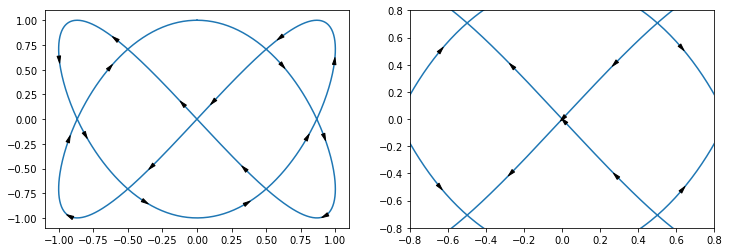

In [11]:
fig, axes = pl.subplots(1, 2, figsize=(12, 4))
line0, = axes[0].plot(x, y)
line1, = axes[1].plot(x, y)

axes[1].set_xlim(-0.8, 0.8)
axes[1].set_ylim(-0.8, 0.8)

add_arrows(line0, 20)
add_arrows(line1, 20);